In [91]:
#import things

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.stats as sts
from scipy.stats import linregress 
import gmaps

from config import g_key

In [92]:
df = pd.read_csv('Complete.csv')

df.head()

,State,2018:Q1,2018:Q2,2018:Q3,2018:Q4,Total GDP,Date,Number of Deaths,Pop2018,Region
0,Alabama,217369.7,220572.2,223140.7,225859.4,886942.0,20200916,2392,4887870,East South Central
1,Alaska,53563.0,54372.7,55410.0,55590.6,218936.3,20200916,44,737438,Pacific
2,Arizona,340672.6,345474.0,351708.8,355332.9,1393188.3,20200916,5371,7171650,Mountain
3,Arkansas,126088.8,128352.5,129032.8,130201.5,513675.6,20200916,1157,3013820,West South Central
4,California,2928096.5,2992622.8,3017340.5,3052871.3,11990931.1,20200916,14615,39557000,Pacific


In [93]:
df.dtypes

State                object
2018:Q1             float64
2018:Q2             float64
2018:Q3             float64
2018:Q4             float64
Total GDP           float64
Date                  int64
Number of Deaths      int64
Pop2018               int64
Region               object
dtype: object

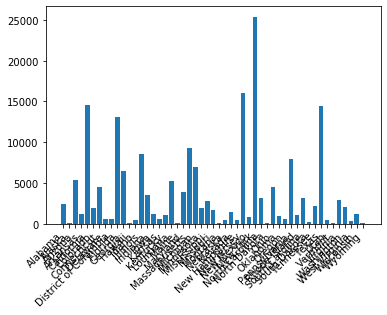

<Figure size 7200x3600 with 0 Axes>

In [94]:
# df['Number of Deaths'].plot(kind='bar', color={'red'})

plt.bar(x=df['State'], height=df['Number of Deaths'], alpha=1, align='center', width=.8)

x_axis = np.arange(len(df['State']))


plt.xticks(x_axis, df['State'], rotation=45, ha='right')
plt.figure(figsize=(100,50))

plt.subplots_adjust(bottom=0.15)



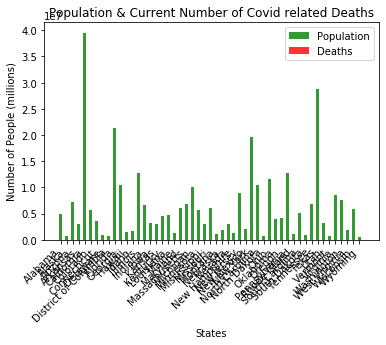

In [95]:
#compare two data sets, GDP & deaths per state
n_groups = (len(df['State']))
pop_data = df['Pop2018']
ded_data = df['Number of Deaths']

# print(n_groups)
# print(gdp_data)
# print(ded_data)

#create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = .50
opacity = .8

pop_bar = plt.bar(index, pop_data, bar_width, alpha = opacity,
                 color='green',
                 label='Population')

ded_bar = plt.bar(index + bar_width, ded_data, bar_width, alpha = opacity,
                 color='red',
                 label='Deaths')

plt.xlabel('States')
plt.title('Population & Current Number of Covid related Deaths')
plt.ylabel('Number of People (millions)')
plt.xticks(index, df['State'], rotation=45, ha='right')
plt.legend()



# #x values
# pop2018 = df['Pop2018']
# death = df['Number of Deaths']

# # y values 
# gdp_data = df['Total GDP']

# plt.bar(pop2018, color='blue')
# plt.bar(death, bottom=)

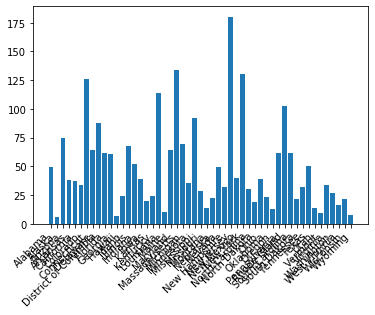

<Figure size 7200x3600 with 0 Axes>

In [96]:
per_capita = df['Number of Deaths'] / df['Pop2018']*100000

per_capita


plt.bar(x=df['State'], height=per_capita, alpha=1, align='center', width=.8)

x_axis = np.arange(len(df['State']))


plt.xticks(x_axis, df['State'], rotation=45, ha='right')
plt.figure(figsize=(100,50))

plt.subplots_adjust(bottom=0.15)

In [97]:
gmaps.configure(api_key=g_key)

                   State
0                Alabama
1                 Alaska
2                Arizona
3               Arkansas
4             California
5               Colorado
6            Connecticut
7               Delaware
8   District of Columbia
9                Florida
10               Georgia
11                Hawaii
12                 Idaho
13              Illinois
14               Indiana
15                  Iowa
16                Kansas
17              Kentucky
18             Louisiana
19                 Maine
20              Maryland
21         Massachusetts
22              Michigan
23             Minnesota
24           Mississippi
25              Missouri
26               Montana
27              Nebraska
28                Nevada
29         New Hampshire
30            New Jersey
31            New Mexico
32              New York
33        North Carolina
34          North Dakota
35                  Ohio
36              Oklahoma
37                Oregon
38          Pennsylvania


25410

In [115]:
df

f_path = os.path.join('Resources', 'statelatlong.csv')

coord_df = pd.read_csv(f_path)

new_cor = coord_df.drop(columns='State').rename(columns={'City': 'State'})

coords = df.merge(new_cor, on='State', how='left')

coords



,State,2018:Q1,2018:Q2,2018:Q3,2018:Q4,Total GDP,Date,Number of Deaths,Pop2018,Region,Latitude,Longitude
0,Alabama,217369.7,220572.2,223140.7,225859.4,886942.0,20200916,2392,4887870,East South Central,32.601011,-86.680736
1,Alaska,53563.0,54372.7,55410.0,55590.6,218936.3,20200916,44,737438,Pacific,61.302501,-158.775020
2,Arizona,340672.6,345474.0,351708.8,355332.9,1393188.3,20200916,5371,7171650,Mountain,34.168219,-111.930907
3,Arkansas,126088.8,128352.5,129032.8,130201.5,513675.6,20200916,1157,3013820,West South Central,34.751928,-92.131378
4,California,2928096.5,2992622.8,3017340.5,3052871.3,11990931.1,20200916,14615,39557000,Pacific,37.271875,-119.270415
5,Colorado,362721.2,370476.6,375311.6,378488.8,1486998.2,20200916,1905,5695560,Mountain,38.997934,-105.550567
6,Connecticut,272854.5,273884.5,278294.5,277874.1,1102907.6,20200916,4487,3572660,New England,41.518784,-72.757507
7,Delaware,72091.2,73024.7,74461.4,74348.1,293925.4,20200916,619,967171,South Atlantic,39.145251,-75.418921
8,District of Columbia,138469.2,139579.6,141968.8,142626.2,562643.8,20200916,617,702455,South Atlantic,38.899349,-77.014567
9,Florida,1020176.9,1032277.4,1048477.6,1056013.7,4156945.6,20200916,13100,21299300,South Atlantic,27.975728,-83.833017


In [119]:
locations = coords[['Latitude', 'Longitude']]

# print(locations)

ded = coords['Number of Deaths']

ded.max()

25410

In [123]:
fig = gmaps.figure()

ded_layer = gmaps.heatmap_layer(locations, weights=ded,
                               dissipating=False, max_intensity=25410,
                               point_radius=.9)

fig.add_layer(ded_layer)

fig

Figure(layout=FigureLayout(height='420px'))

25410
51
51


Text(0, 0.5, 'GDP $ (millions)')

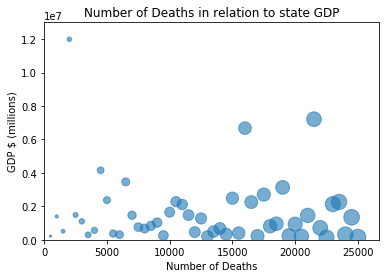

In [154]:
# x_limit = df['Total GDP'].max()
# print(x_limit)
# x_axis = np.arange(0, x_limit, 100)
x_limit = df['Number of Deaths'].max()
print(x_limit)
x_axis = np.arange(0, x_limit, 500)

print(len(x_axis))

data = df['Total GDP']

print(len(data))
plt.scatter(x=x_axis, y=data, s=x_axis*.01, alpha=0.6)

plt.ylim(0, 13000000)
plt.xlim(0, x_limit*1.05)
plt.title('Number of Deaths in relation to state GDP')
plt.xlabel('Number of Deaths')
plt.ylabel('GDP $ (millions)')

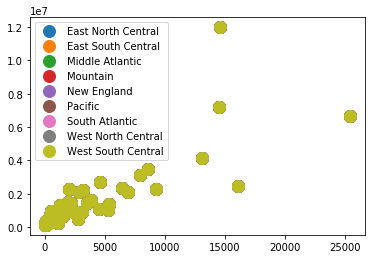

In [163]:
regions = df.groupby('Region')

fig, ax = plt.subplots()
ax.margins(0.05)
for state, region in regions:
    plt.plot(df["Number of Deaths"], df["Total GDP"], marker="o", linestyle="", ms=12, label=state)
ax.legend()